[link script](https://nbviewer.org/github/NeuroanatomyAndConnectivity/gradient_analysis/blob/master/04_visualize_networks.ipynb)

In [30]:
%matplotlib inline 

# !git clone https://github.com/margulies/gradient_analysis

import h5py, sys, io, os, numpy as np
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'

In [21]:
# !git clone https://github.com/gablab/cerebellum_gradients/

Cloning into 'cerebellum_gradients'...
remote: Enumerating objects: 230, done.
remote: Total 230 (delta 0), reused 0 (delta 0), pack-reused 230
Receiving objects: 100% (230/230), 11.59 MiB | 6.79 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [56]:
import sys
import pandas as pd

# sys.path.append('/content/gradient_analysis/gradient_data/templates')
templates_path = '/home/romy.beaute/projects/hypnomed/data/template'
templates_marguilies = '/home/romy.beaute/projects/hypnomed/analysis/gradient_analysis/gradient_data/templates'

output_path = '/home/romy.beaute/projects/hypnomed/analysis/results/yeo_networks/'

yeo_infos = pd.read_csv('/home/romy.beaute/projects/hypnomed/data/yeo_infos/7NetworksOrderedNames.csv',delimiter=',')
list(yeo_infos[' Network Name'])

colors = ['purple','blue','green','violet','cream','orange','red']
yeo_infos['colors']=colors 

yeo_infos

,Network Order,Network Name,colors
0,1,Visual,purple
1,2,Somatomotor,blue
2,3,Dorsal Attention,green
3,4,Salience / Ventral Attention,violet
4,5,Limbic,cream
5,6,Control,orange
6,7,Default,red


In [8]:

def imageCrop(filename):

    from PIL import Image

    i1 = Image.open(filename)
    i2 = np.array(i1)
    i2[i2.sum(axis=2) == 255*4,:] = 0
    i3 = i2.sum(axis=2)
    x = np.where((i3.sum(axis=1) != 0) * 1)[0]
    y = np.where((i3.sum(axis=0) != 0) * 1)[0]

    result = Image.fromarray(i2[x.squeeze()][:,y.squeeze()])
    result.save(filename)

In [9]:

surfmL = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf')
surfiL = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.L.very_inflated.32k_fs_LR.surf')
surfL = []
surfL.append(np.array(surfmL[0]*0.3 + surfiL[0]*0.7))
surfL.append(surfmL[1])

surfmR = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf')
surfiR = nib.freesurfer.read_geometry(templates_marguilies+'/Q1-Q6_R440.R.very_inflated.32k_fs_LR.surf')
surfR = []
surfR.append(np.array(surfmR[0]*0.3 + surfiR[0]*0.7))
surfR.append(surfmR[1])


sulcL = -1 * nib.load(templates_marguilies+'/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').get_fdata()[0:32492]
sulcR = -1 * nib.load(templates_marguilies+'/Q1-Q6_R440.sulc.32k_fs_LR.dscalar.nii').get_fdata()[32492:32492*2]

# res = nib.load(templates_path+'/hcp.tmp.lh.dscalar.nii').get_fdata()
res = nib.load(templates_path+'/hcp.tmp.lh.dscalar.nii').get_fdata()
cortL = np.squeeze(np.array(np.where(res != 0)[1],dtype=np.int32))
# res = nib.load(templates_path+'/hcp.tmp.rh.dscalar.nii').get_fdata()
res = nib.load(templates_path+'/hcp.tmp.rh.dscalar.nii').get_fdata()
cortR = np.squeeze(np.array(np.where(res != 0)[1], dtype=np.int32))
cortLen = len(cortL) + len(cortR)
del res

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [80]:
cortLen

59412

In [10]:
import sys
sys.path.append('/home/romy.beaute/projects/hypnomed/META/')
from scipy.io import loadmat
from helpers_gradient import *

embmat_path = '/home/romy.beaute/projects/hypnomed/data/emb_matrices'
matfile = 'control_meditation_hypnose'
# emb = np.load(embmat_path+'/group_{}_embedding.mat'.format(matfile))

b,b_emb = load_embmat(embmat_path+'/group_{}_embedding.mat'.format(matfile),show_infos=True)
b_emb.shape

emb_con = b_emb[:40]
emb_med = b_emb[40:80]
emb_hyp = b_emb[80:]

embeddings = {
    'control':emb_con,
    'meditation':emb_med,
    'hypnose':emb_hyp
    }

 - shape embedding (n_subjects, n_voxels, n_dims): (119, 18715, 5)
 - n = 40 subjects
 - condition : ['control   ' 'meditation' 'hypnose   ']
 - path : /home/romy.beaute/projects/hypnomed/data/emb_matrices/group_control_meditation_hypnose_embedding.mat



In [105]:
b['emb'].shape

(119, 18715, 5)

In [74]:
from nilearn import surface


fsaverage = datasets.fetch_surf_fsaverage()

nilearn.datasets.fetch_surf_fsaverage(mesh='fsaverage5', data_dir=None).sulc_left

sulc_l = surface.load_surf_data(fsaverage['sulc_left'])
sulc_r = 10242+surface.load_surf_data(fsaverage['sulc_right'])
# sulc_r = surface.load_surf_data(fsaverage['sulc_right'])


surf_l = surface.load_surf_data(fsaverage['infl_left']) #infl_left
surf_r = 10242+surface.load_surf_data(fsaverage['infl_right']) #infl_right
# surf_r = surface.load_surf_data(fsaverage['infl_right']) #infl_right

# nilearn.datasets.fetch_surf_fsaverage(mesh='fsaverage5', data_dir=None).sulc_left


/home/romy.beaute/anaconda3/lib/python3.9/site-packages/nilearn/surface/surface.py:671: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray([arr.data for arr in gifti_img.darrays]).T.squeeze()


### Yeo7 networks

In [12]:
# yeo7L = nib.gifti.read(templates_path+'/hcp.RSN.L.gii').darrays[0].data
yeo7L = nib.load(templates_marguilies+'/hcp.RSN.L.gii').darrays[0].data
yeo7R = nib.load(templates_marguilies+'/hcp.RSN.R.gii').darrays[0].data
# yeo17L = nib.load(templates_path+'/hcp.RSN.L.gii').darrays[1].data
# yeo17R = nib.load(templates_path+'/hcp.RSN.R.gii').darrays[1].data

In [83]:
# Load Freesurfer fsaverage surface with read_label : return array with indices of vertices included in label
lab_lh = nib.freesurfer.read_label(templates_path+'/lh.cortex.label') #shape = (9361,)
lab_rh = 10242 + nib.freesurfer.read_label(templates_path+'/rh.cortex.label') #shape = (9361,)

lab= np.concatenate((lab_lh,lab_rh))

['1', '3', '2', '6', '4', '5', '7']
[0, 1, 2, 3, 4, 5, 6]
0                           Visual
1                      Somatomotor
2                 Dorsal Attention
3     Salience / Ventral Attention
4                           Limbic
5                          Control
6                          Default
Name:  Network Name, dtype: object
None


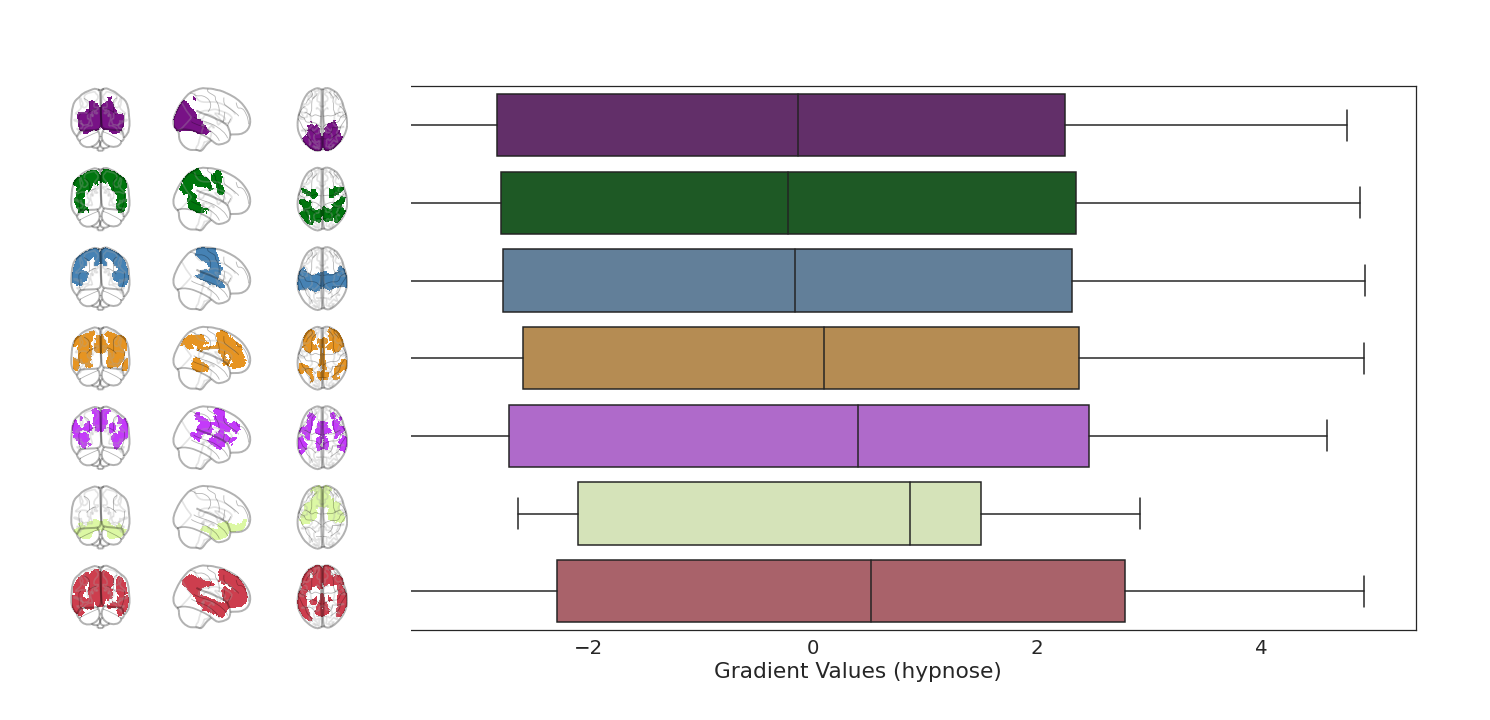

In [79]:
from PIL import Image
from IPython.display import Image as im

for condition in ['hypnose']:
    # ,'meditation','hypnose']:

    emb = np.mean(embeddings[condition],axis=0) #average across subjects


    # yeo7 = np.concatenate((yeo7L[cortL], yeo7L[cortR]))
    yeo7 = np.concatenate((yeo7L[lab_lh], yeo7L[lab_rh]))
    uniqueY = np.array(np.unique(yeo7), dtype=np.int32)[1::]
    sz = len(uniqueY) #7 (corresponds to length network)
    rsns={}
    for c in range(sz): #creates dictionnary
        rsns['k'+str(int(c)+1)]=[]

    r = []     

    for x in range(sz):
        # g = emb[np.where(yeo7 == uniqueY[x]),0]
        g = emb[np.where(yeo7 == uniqueY[x])]
        # for y in g[0]:
        for y in g:
            if y != 0:
                rsns['k'+str(int(x)+1)].append(float(y))
        r.append(np.mean(rsns['k'+str(int(x)+1)]))

    ord = np.argsort(r)

    plot_list=[]
    for c in range(sz):    
        plot_list+=[np.squeeze(rsns['k'+str(ord[c]+1)])]

    names=[]
    for c in range(sz):
        names.append(str(int(ord[c])+1))

    print(names)
#     # convertYeo7 = [2,5,6,0,4,1,3] 
    convertYeo7 = [0,1,2,3,4,5,6]
    print(convertYeo7)
    print(print(yeo_infos[' Network Name']))
    cols7 = ((255,255,255),
            (120,  18, 134), #purple
            (70 ,130, 180), #blue
            ( 0 ,118 , 14), #green
            (196 , 58 ,250), #violet
            (220 ,248 ,164), #cream
            (230, 148,  34), #orange
            (205 , 62,  78 )) #red
    cols = cols7
    cols = np.asarray(cols, dtype=float)/255
    yeoCols = ListedColormap(cols,name='colormapYeo')
    print(yeoCols)

    colors1 = list()
    for i in range(0,len(ord)):
        colors1.append(tuple(cols[convertYeo7[ord[i]] + 1]))

    height=10
    sns.set_context('notebook', font_scale=1.8)
    sns.axes_style("white")
    sns.set_style("white")
    sns.set_palette(colors1)

    fig = plt.figure(figsize=(20,height))
    ax = sns.boxplot(data=plot_list, saturation=0.5, orient='h', showfliers=False) #flierprops=None)#dict(marker='', markersize=0, 
                                                                                #color="white", markeredgecolor="white"))
    ax.set_yticklabels('')
    ax.set(xlabel='Gradient Values ({})'.format(condition))
    sns.axes_style("white")
    # sns.axlabel('Gradient Values','', fontsize=22)
    #ax.xlabel('Gradient Values','', fontsize=22)
    # plt.savefig('gradient_data/figures/yeo_dist_plot.pdf')
    # plt.savefig('gradient_data/figures/yeo_dist_plot.png')
    # plt.savefig(output_path+'yeo_dist_plot_{}.pdf'.format(condition))
    plt.savefig(output_path+'yeo_dist_plot_{}.png'.format(condition))
    plt.close(fig)

    fig, axarr = plt.subplots(nrows=sz, ncols=1, figsize=(2*(20/sz),height))
    data = datasets.fetch_atlas_yeo_2011(data_dir='gradient_data/templates/')
    yeoV7 = nibabel.load(data.thick_7)
    y = 0

    for x in range(sz):
        yeoV7_1 = nibabel.Nifti1Image((yeoV7.get_fdata() == convertYeo7[ord[x]] + 1).astype(int), yeoV7.affine)     
        yeoCols = ListedColormap(cols[[0,convertYeo7[ord[x]] + 1]],name='colormapYeo')
        plotting.plot_glass_brain(yeoV7_1, axes=axarr[x], annotate=False, alpha=0.3, cmap=yeoCols, threshold=0.1, 
                            output_file=output_path+'yeo_brains_{}.png'.format(condition))
        y += 1


    i1 = Image.open(output_path+'yeo_dist_plot_{}.png'.format(condition))
    i2 = Image.open(output_path+'yeo_brains_{}.png'.format(condition))
    result = Image.new("RGBA", (np.shape(i1)[1]+50, np.shape(i1)[0]))
    result.paste(i1, (120, 0))
    result.paste(i2, (0, 0))
    result.save(output_path+'Yeo7_{}.png'.format(condition))
    os.remove(output_path+'yeo_dist_plot_{}.png'.format(condition))
    os.remove(output_path+'yeo_brains_{}.png'.format(condition))
    
im(filename=output_path+'Yeo7_{}.png'.format(condition))

In [347]:
atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
atlas_yeo = atlas_yeo_2011.thick_7
atlas_yeo
from nilearn.regions import connected_label_regions
region_labels = connected_label_regions(atlas_yeo)
region_labels

/usr/local/lib/python3.7/dist-packages/nilearn/regions/region_extractor.py:546: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  new_labels_img = new_img_like(labels_img, new_labels_data, affine=affine)
